# Size Korea

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

In [2]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '결측치 수(null)' : df.isnull().sum(),
                       '결측치 비율' : (df.isnull().sum()/df.shape[0]).round(4)*100,
                       '고유값 수(nunique)' : df.nunique()})
    return tf

## 1. 데이터 불러오고 합치기

In [7]:
%time df1 = pd.read_excel('../data/2010_6차_직접측정 데이터.xlsx')
%time df2 = pd.read_excel('../data/2015_7차_직접측정 데이터.xlsx')

Wall time: 15.3 s
Wall time: 6.8 s


In [5]:
df1 = pd.read_pickle('../data/2010_6차_직접측정 데이터.pkl')
df2 = pd.read_pickle('../data/2010_7차_직접측정 데이터.pkl')

ValueError: unsupported pickle protocol: 5

In [8]:
df1.head(2)
df2.head(2)

,성별,나이,101:오른쪽어깨경사각,102:왼쪽어깨경사각,103:머리위로뻗은주먹높이,104:키,105:눈높이,106:목뒤높이,107:어깨높이,108:어깨가쪽높이,...,527:왼쪽상체근육발달,528:오른쪽상체근육발달,529:왼쪽하체근육발달,530:오른쪽하체근육발달,531:몸통근육발달,532:왼쪽상체체지방,533:오른쪽상체체지방,534:왼쪽하체체지방,535:오른쪽하체체지방,536:몸통체지방
0,남,23,22,24,2088,1740,1616,1475,1429,1448,...,표준,표준,표준,표준,표준,표준,표준,표준,표준,표준
1,남,22,24,18,2002,1722,1596,1439,1368,1394,...,표준,표준,표준,표상,표준,표하,표하,표하,표준,표준


,ⓞ_02_성별,ⓞ_06_나이_반올림,ⓞ_12_골격근량,ⓞ_13_체지방량,ⓞ_14_체수분,ⓞ_15_단백질,ⓞ_16_무기질,ⓞ_17_BMI,ⓞ_18_체지방율,ⓞ_19_복부지방율,...,①_124_무릎아래둘레,①_125_장딴지둘레,①_126_종아리최소둘레,①_127_발목최대둘레,①_128_발목너비,①_129_발뒤꿈치너비,①_130_위팔둘레,①_131_팔꿈치둘레,①_132_손목둘레,①_133_머리위로뻗은주먹높이
0,남,25,33.2,13.6,42.9,11.8,3.8,23.924112,18.9,0.9,...,325.0,370.0,209.0,241.0,50.0,62.0,325.0,286.0,153.0,2013.0
1,남,28,44.5,28.7,56.5,15.5,5.5,31.608187,27.0,0.9,...,396.0,439.0,260.0,295.0,62.0,77.0,395.0,318.0,179.0,2160.0


### 1.1 컬럼명 동일화

In [9]:
col = []
for i in df1.columns:
    i
    if len(i.split(':')) > 1:
        col.append(i.split(':')[1])
    else:
        col.append(i.split(':')[0])

'성별'

'나이'

'101:오른쪽어깨경사각'

'102:왼쪽어깨경사각'

'103:머리위로뻗은주먹높이'

'104:키'

'105:눈높이'

'106:목뒤높이'

'107:어깨높이'

'108:어깨가쪽높이'

'109:겨드랑높이'

'110:굽힌팔꿈치높이'

'111:엉덩이높이'

'112:주먹높이'

'113:허리높이'

'114:배꼽수준허리높이'

'115:위앞엉덩뼈가시높이'

'116:무릎높이'

'117:가슴너비'

'118:젖가슴너비'

'119:허리너비'

'120:배꼽수준허리너비'

'121:엉덩이너비'

'122:겨드랑두께'

'123:가슴두께'

'124:젖가슴두께'

'125:허리두께'

'126:배꼽수준허리두께'

'127:엉덩이두께'

'128:샅높이'

'129:몸통수직길이'

'130:엉덩이수직길이'

'131:허리기준선높이'

'201:앞중심길이'

'202:배꼽수준앞중심길이'

'203:겨드랑앞벽사이길이'

'204:겨드랑앞접힘사이길이'

'205:젖꼭지사이수평길이'

'206:목둘레'

'207:목밑둘레'

'208:가슴둘레'

'209:젖가슴둘레'

'210:젖가슴아래둘레'

'211:허리둘레'

'212:배꼽수준허리둘레'

'213:배둘레'

'214:엉덩이둘레'

'215:배돌출점기준엉덩이둘레'

'216:어깨길이'

'217:목뒤등뼈위겨드랑수준길이'

'218:등길이'

'219:배꼽수준등길이'

'220:목뒤오금길이'

'221:총길이'

'222:넙다리직선길이'

'223:어깨사이길이'

'224:어깨가쪽사이길이'

'225:겨드랑뒤벽사이길이'

'226:겨드랑뒤벽접힘사이길이'

'227:목뒤젖꼭지길이'

'228:목뒤젖꼭지허리둘레선길이'

'229:목옆젖꼭지길이'

'230:목옆허리둘레선길이'

'231:목옆어깨뼈아래허리둘레선길이'

'232:위팔길이'

'233:팔길이'

'234:팔안쪽길이'

'235:목뒤손목안쪽길이'

'236:겨드랑둘레'

'237:엉덩이옆길이'

'238:다리가쪽길이'

'239:몸통세로둘레'

'240:샅앞뒤길이'

'241:배꼽수준샅앞뒤길이'

'301:앉은키'

'302:앉은눈높이'

'303:앉은목뒤높이'

'304:앉은어깨높이'

'305:앉은팔꿈치높이'

'306:앉은넙다리높이'

'307:앉은무릎높이'

'308:앉은오금높이'

'309:앉은엉덩이무릎수평길이'

'310:앉은엉덩이오금수평길이'

'311:앉은엉덩이배두께'

'312:위팔수직길이'

'313:아래팔수평길이'

'314:팔꿈치손끝수평길이'

'315:팔꿈치주먹수평길이'

'316:앉은배두께'

'317:어깨너비'

'318:위팔사이너비'

'319:팔꿈치사이너비'

'320:앉은엉덩이너비'

'321:머리수직길이'

'322:얼굴수직길이'

'323:벽면앞으로뻗은주먹수평길이'

'324:벽면몸통두께'

'325:벽면어깨수평길이'

'326:엉덩이돌출점-배돌출점두께'

'401:머리두께'

'402:머리너비'

'403:머리둘레'

'404:귀구슬머리위길이'

'405:눈살뒤통수길이'

'406:눈동자사이너비'

'407:손직선길이'

'408:손바닥직선길이'

'409:손너비'

'410:둘째손가락직선길이'

'411:둘째손가락첫째관절너비'

'412:둘째손가락둘째관절너비'

'413:손두께'

'414:막대쥔손안둘레'

'415:손둘레'

'416:발너비'

'417:발직선길이'

'418:가쪽복사높이'

'419:넙다리둘레'

'420:넙다리중간둘레'

'421:무릎둘레'

'422:무릎아래둘레'

'423:장딴지둘레'

'424:종아리최소둘레'

'425:발목최대둘레'

'426:팔꿈치둘레'

'427:손목둘레'

'428:위팔둘레'

'510:몸무게'

'511:골격근량'

'512:체지방량'

'513:체수분'

'514:제지방량'

'515:단백질'

'516:무기질'

'517:BMI'

'518:BMI 평가'

'519:체지방률'

'520:체지방률 평가'

'521:복부지방률'

'522:복부지방률 평가'

'523:기초대사량'

'524:기초대사량 평가'

'525:근육조절'

'526:지방조절'

'527:왼쪽상체근육발달'

'528:오른쪽상체근육발달'

'529:왼쪽하체근육발달'

'530:오른쪽하체근육발달'

'531:몸통근육발달'

'532:왼쪽상체체지방'

'533:오른쪽상체체지방'

'534:왼쪽하체체지방'

'535:오른쪽하체체지방'

'536:몸통체지방'

In [10]:
df1.columns = col
df1.columns

Index(['성별', '나이', '오른쪽어깨경사각', '왼쪽어깨경사각', '머리위로뻗은주먹높이', '키', '눈높이', '목뒤높이',
       '어깨높이', '어깨가쪽높이',
       ...
       '왼쪽상체근육발달', '오른쪽상체근육발달', '왼쪽하체근육발달', '오른쪽하체근육발달', '몸통근육발달', '왼쪽상체체지방',
       '오른쪽상체체지방', '왼쪽하체체지방', '오른쪽하체체지방', '몸통체지방'],
      dtype='object', length=155)

In [11]:
col = []
for i in df2.columns:
    i
    col.append(i.split('_')[2])

'ⓞ_02_성별'

'ⓞ_06_나이_반올림'

'ⓞ_12_골격근량'

'ⓞ_13_체지방량'

'ⓞ_14_체수분'

'ⓞ_15_단백질'

'ⓞ_16_무기질'

'ⓞ_17_BMI'

'ⓞ_18_체지방율'

'ⓞ_19_복부지방율'

'ⓞ_20_복부지방율평가'

'ⓞ_21_기초대사량'

'ⓞ_22_기초대사량평가'

'ⓞ_23_근육조절'

'ⓞ_24_지방조절'

'①_001_오른쪽어깨경사각'

'①_002_왼쪽어깨경사각'

'①_003_키'

'①_004_눈높이'

'①_005_목뒤높이'

'①_006_어깨높이'

'①_007_어깨가쪽높이'

'①_008_겨드랑높이'

'①_009_굽힌팔꿈치높이'

'①_010_허리기준선높이'

'①_011_엉덩이높이'

'①_012_주먹높이'

'①_013_허리높이'

'①_014_배꼽수준허리높이'

'①_015_위앞엉덩뼈가시높이'

'①_016_무릎높이'

'①_017_샅높이'

'①_018_가슴너비'

'①_019_젖가슴너비'

'①_020_허리너비'

'①_021_배꼽수준허리너비'

'①_022_엉덩이너비'

'①_023_겨드랑두께'

'①_024_가슴두께'

'①_025_젖가슴두께'

'①_026_허리두께'

'①_027_배꼽수준허리두께'

'①_028_엉덩이두께'

'①_029_몸통수직길이'

'①_030_엉덩이수직길이'

'①_031_몸무게'

'①_032_앞중심길이'

'①_033_배꼽수준앞중심길이'

'①_034_겨드랑앞벽사이길이'

'①_035_겨드랑앞접힘사이길이'

'①_036_젖꼭지사이수평길이_여'

'①_037_목둘레'

'①_038_목밑둘레'

'①_039_가슴둘레'

'①_040_젖가슴둘레'

'①_041_젖가슴아래둘레_여'

'①_042_허리둘레'

'①_043_배꼽수준허리둘레'

'①_044_배둘레'

'①_045_엉덩이둘레'

'①_046_배돌출점기준엉덩이둘레'

'①_047_어깨길이'

'①_048_목뒤등뼈위겨드랑수준길이'

'①_049_등길이'

'①_050_배꼽수준등길이'

'①_051_목뒤오금길이'

'①_052_총길이'

'①_053_넙다리직선길이'

'①_054_어깨사이길이'

'①_055_어깨가쪽사이길이'

'①_056_겨드랑뒤벽사이길이'

'①_057_겨드랑뒤벽접힘사이길이'

'①_058_목뒤젖꼭지길이'

'①_059_목뒤젖꼭지허리둘레선길이'

'①_060_목옆젖꼭지길이_여_'

'①_061_목옆허리둘레선길이'

'①_062_목옆어깨뼈아래허리둘레선길이'

'①_063_위팔길이'

'①_064_팔길이'

'①_065_팔안쪽길이'

'①_066_목뒤손목안쪽길이'

'①_067_겨드랑둘레'

'①_068_엉덩이옆길이'

'①_069_다리가쪽길이'

'①_070_몸통세로둘레'

'①_071_샅앞뒤길이'

'①_072_배꼽수준샅앞뒤길이'

'①_073_앉은키'

'①_074_앉은눈높이'

'①_075_앉은목뒤높이'

'①_076_앉은어깨높이'

'①_077_앉은팔꿈치높이'

'①_078_앉은넙다리높이'

'①_079_앉은무릎높이'

'①_080_앉은오금높이'

'①_081_앉은엉덩이무릎수평길이'

'①_082_앉은엉덩이오금수평길이'

'①_083_앉은엉덩이배두께'

'①_084_위팔수직길이'

'①_085_아래팔수평길이'

'①_086_팔꿈치손끝수평길이'

'①_087_팔꿈치주먹수평길이'

'①_088_앉은배두께'

'①_089_어깨너비'

'①_090_위팔사이너비'

'①_091_팔꿈치사이너비'

'①_092_앉은엉덩이너비'

'①_093_머리수직길이'

'①_094_얼굴수직길이'

'①_095_벽면앞으로뻗은주먹수직길이'

'①_096_벽면몸통두께'

'①_097_벽면어깨수평길이'

'①_098_엉덩이돌출점_배돌출점두께'

'①_099_눈동자사이너비'

'①_100_눈구석사이너비'

'①_101_눈살점_눈확아래점사이길이'

'①_102_손직선길이'

'①_103_손바닥직선길이'

'①_104_손너비'

'①_105_둘째손가락직선길이'

'①_106_둘째손가락첫째관절너비'

'①_107_둘째손가락둘째관절너비'

'①_108_손두께'

'①_109_막대쥔손안둘레'

'①_110_손둘레'

'①_111_머리둘레'

'①_112_귀구슬머리위길이'

'①_113_눈살뒤통수길이'

'①_114_머리두께'

'①_115_머리너비'

'①_116_얼굴너비'

'①_117_아래턱사이너비'

'①_118_발너비'

'①_119_발직선길이'

'①_120_가쪽복사높이'

'①_121_넙다리둘레'

'①_122_넙다리중간둘레'

'①_123_무릎둘레'

'①_124_무릎아래둘레'

'①_125_장딴지둘레'

'①_126_종아리최소둘레'

'①_127_발목최대둘레'

'①_128_발목너비'

'①_129_발뒤꿈치너비'

'①_130_위팔둘레'

'①_131_팔꿈치둘레'

'①_132_손목둘레'

'①_133_머리위로뻗은주먹높이'

In [12]:
df2.columns = col
df2.columns

Index(['성별', '나이', '골격근량', '체지방량', '체수분', '단백질', '무기질', 'BMI', '체지방율', '복부지방율',
       ...
       '무릎아래둘레', '장딴지둘레', '종아리최소둘레', '발목최대둘레', '발목너비', '발뒤꿈치너비', '위팔둘레',
       '팔꿈치둘레', '손목둘레', '머리위로뻗은주먹높이'],
      dtype='object', length=148)

### 1.2 동일한 컬러명 set로 찾기

In [13]:
cols_union = set(df1.columns) & set(df2.columns)
len(cols_union)

136

In [14]:
df = df1[cols_union].append(df2[cols_union])
df.shape

(13952, 136)

## 컬럼의 개수가 많아 선택시

In [19]:
summary(df).to_excel('../working/인체.xlsx')

In [20]:
tf = pd.read_excel('../working/인체_choice.xlsx')
tf.head()

,Unnamed: 0,데이터형태(dtypes),결측치 수(null),결측치 비율,고유값 수(nunique),choice
0,BMI,float64,8,0.06,7027,1.0
1,가슴너비,float64,3,0.02,226,NaN
2,가슴두께,float64,3,0.02,181,NaN
3,가슴둘레,float64,5,0.04,627,NaN
4,가쪽복사높이,float64,3,0.02,55,NaN


In [21]:
tf[tf['choice'] == 1.0]['Unnamed: 0'].tolist()

['BMI',
 '골격근량',
 '기초대사량',
 '나이',
 '단백질',
 '목둘레',
 '몸무게',
 '무기질',
 '발너비',
 '발직선길이',
 '성별',
 '체수분',
 '체지방량',
 '키']

In [22]:
df = df[tf[tf['choice'] == 1.0]['Unnamed: 0'].tolist()]
df.head(2)

,BMI,골격근량,기초대사량,나이,단백질,목둘레,몸무게,무기질,발너비,발직선길이,성별,체수분,체지방량,키
0,23.1,32.6,1609.0,23,11.5,353.0,69.8,3.9,97.0,250.0,남,42,12.4,1740.0
1,22.6,33.7,1649.0,22,11.8,361.0,66.9,3.86,110.0,259.0,남,43.5,7.7,1722.0


## 실습을 위해

## 2. 결측치 대체와 자료 전환

### 2.1. 데이터형태가 'object'를 파악하고 변환(결측치가 있으면 자료형태 변환이 불가)

In [23]:
summary(df)

,데이터형태(dtypes),결측치 수(null),결측치 비율,고유값 수(nunique)
BMI,float64,8,0.06,7027
골격근량,object,910,6.52,412
기초대사량,float64,930,6.67,1291
나이,int64,0,0.00,63
단백질,object,919,6.59,152
목둘레,float64,35,0.25,335
몸무게,float64,7,0.05,889
무기질,object,919,6.59,454
발너비,float64,3,0.02,58
발직선길이,float64,4,0.03,127


In [24]:
df.columns[df.dtypes =='object']

Index(['골격근량', '단백질', '무기질', '성별', '체수분', '체지방량'], dtype='object')

In [25]:
df.head()

,BMI,골격근량,기초대사량,나이,단백질,목둘레,몸무게,무기질,발너비,발직선길이,성별,체수분,체지방량,키
0,23.1,32.6,1609.0,23,11.5,353.0,69.8,3.9,97.0,250.0,남,42,12.4,1740.0
1,22.6,33.7,1649.0,22,11.8,361.0,66.9,3.86,110.0,259.0,남,43.5,7.7,1722.0
2,18.4,29.6,1507.0,24,10.4,344.0,58.9,3.57,98.0,261.0,남,38.6,6.3,1788.0
3,21.4,34.4,1686.0,23,12.1,370.0,66.9,3.89,95.0,251.0,남,44.9,6,1770.0
4,23.0,31.5,1584.0,23,11.1,387.0,66.6,3.98,95.0,251.0,남,41.1,10.4,1697.0


#### 체수분 컬럼에 42, 43.5, Nan 등 정수, 실수, Nan이 혼재되어 있어 astype()으로 자료젼환이 불가

In [37]:
for col in ['단백질', '체지방량', '체수분', '무기질', '골격근량']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [42]:
df['성별'] = df['성별'].astype('category')

array([[<AxesSubplot:title={'center':'단백질'}>,
        <AxesSubplot:title={'center':'체지방량'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'체수분'}>],
       [<AxesSubplot:title={'center':'나이'}>,
        <AxesSubplot:title={'center':'근육조절'}>,
        <AxesSubplot:title={'center':'무기질'}>,
        <AxesSubplot:title={'center':'기초대사량'}>],
       [<AxesSubplot:title={'center':'골격근량'}>,
        <AxesSubplot:title={'center':'목둘레'}>,
        <AxesSubplot:title={'center':'키'}>,
        <AxesSubplot:title={'center':'발직선길이'}>],
       [<AxesSubplot:title={'center':'몸무게'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

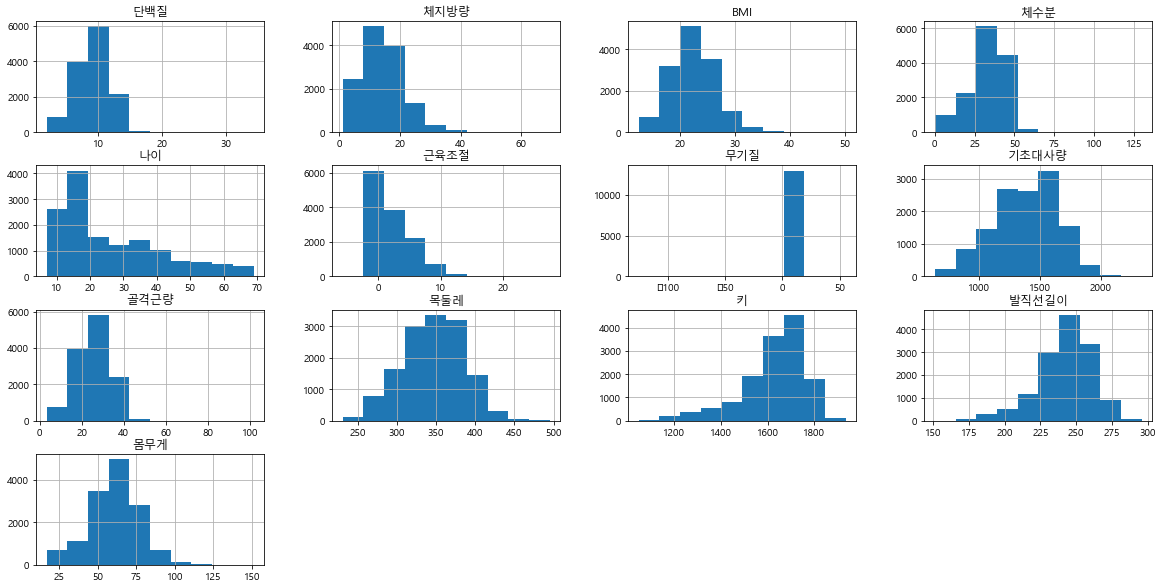

In [51]:
df.drop('성별', axis=1).hist(figsize=(20,10))

### 2.2. 수치형데이터 결측치 대체

In [56]:
df.isnull().sum()

단백질      0
체지방량     0
BMI      0
체수분      0
나이       0
근육조절     0
무기질      0
기초대사량    0
골격근량     0
목둘레      0
키        0
발직선길이    0
몸무게      0
성별       0
dtype: int64

In [55]:
for i in df.columns:
    if i != '성별':
        df[i] = df[i].fillna(df[i].mean())

## 3. 이상치 확인

In [59]:
df.skew()

단백질      -0.116682
체지방량      1.005971
BMI       0.416073
체수분      -0.949278
나이        0.971575
근육조절      1.438822
무기질     -31.950827
기초대사량    -0.221943
골격근량     -0.113881
목둘레      -0.137480
키        -1.118923
발직선길이    -0.760318
몸무게      -0.122488
dtype: float64

<AxesSubplot:>

-0.04828481590802577

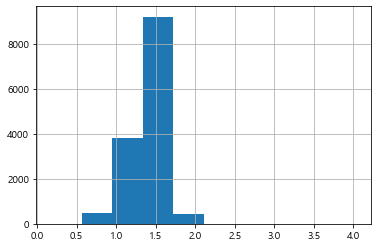

In [69]:
np.log1p(df['무기질']).hist() # 무한대를 피하기 위해 1을 더하고 로그값을 
np.log1p(df['무기질']).skew()

<AxesSubplot:>

3.444364443248738

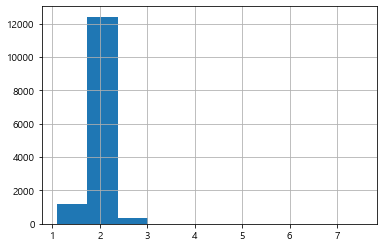

In [70]:
np.sqrt(1+df['무기질']).hist()
np.sqrt(1+df['무기질']).skew()

<AxesSubplot:>

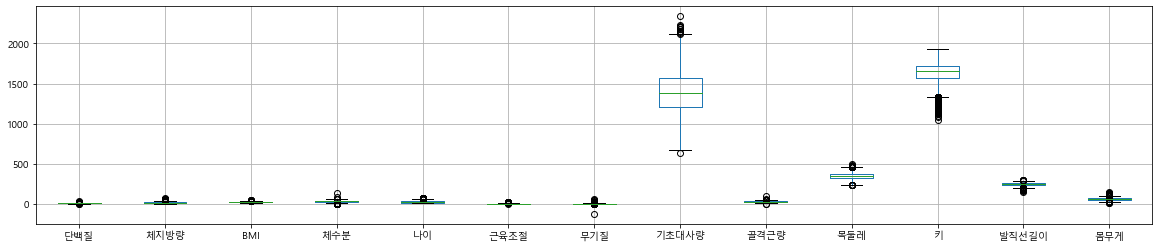

In [58]:
df.boxplot(figsize=(20,4))

In [71]:
df['무기질'] = np.log1p(df['무기질'])

In [72]:
summary(df)

,데이터형태(dtypes),결측치 수(null),결측치 비율,고유값 수(nunique)
단백질,float64,0,0.00,152
체지방량,float64,0,0.00,416
BMI,float64,0,0.00,7028
체수분,float64,0,0.00,491
나이,int64,0,0.00,63
근육조절,float64,0,0.00,163
무기질,float64,2,0.01,452
기초대사량,float64,0,0.00,1292
골격근량,float64,0,0.00,412
목둘레,float64,0,0.00,336


In [163]:
print('nan, inf & -inf 의 개수는 ?  ', df.isin([np.nan, np.inf, -np.inf]).any(1).sum())

nan, inf & -inf 의 개수는 ?   0


In [162]:
df[df.isin([np.nan, np.inf, -np.inf]).any(1)]

,단백질,체지방량,BMI,체수분,나이,근육조절,무기질,기초대사량,골격근량,목둘레,키,발직선길이,몸무게,성별


In [161]:
df.dropna(inplace=True)

## 4. 표준화

In [81]:
df.columns

Index(['단백질', '체지방량', 'BMI', '체수분', '나이', '근육조절', '무기질', '기초대사량', '골격근량',
       '목둘레', '키', '발직선길이', '몸무게', '성별'],
      dtype='object')

In [84]:
mylist = list(df.columns)
mylist.remove('성별')

In [86]:
for i in mylist:
    df[i] = (df[i] -df[i].mean())/df[i].std()

## 5. 인덱스 순번화

In [88]:
df.head()

,단백질,체지방량,BMI,체수분,나이,근육조절,무기질,기초대사량,골격근량,목둘레,키,발직선길이,몸무게,성별
0,0.920105,-0.296574,0.168989,0.796865,-0.229483,-0.848596,0.830838,0.872322,0.902787,0.181223,0.812328,0.429581,0.570607,남
1,1.044407,-1.000291,0.042565,0.919035,-0.295233,-0.848596,0.791514,1.027994,1.053796,0.390904,0.679856,0.903878,0.389613,남
2,0.464330,-1.209908,-1.019400,0.519946,-0.163733,1.760404,0.496349,0.475360,0.490943,-0.054667,1.165586,1.009277,-0.109681,남
3,1.168709,-1.254826,-0.260854,1.033061,-0.229483,-0.848596,0.821037,1.171990,1.149893,0.626795,1.033114,0.482280,0.389613,남
4,0.754369,-0.596028,0.143704,0.723563,-0.229483,-0.848596,0.908531,0.775027,0.751777,1.072366,0.495867,0.482280,0.370889,남


In [93]:
df = df.reset_index().drop('index', axis=1)
df.tail(5)

,단백질,체지방량,BMI,체수분,나이,근육조절,무기질,기초대사량,골격근량,목둘레,키,발직선길이,몸무게,성별
13947,-0.530088,0.601788,-0.493972,-0.164206,-0.426732,1.152829,-0.142763,-0.489803,-0.524938,-0.159508,0.562103,0.007984,-0.065993,여
13948,-0.612956,0.122662,-0.408481,-0.253798,-0.426732,0.116377,-0.388841,-0.610448,-0.621035,-0.657499,-0.041380,-0.044716,-0.359329,여
13949,-1.027297,0.152607,-0.101295,-0.547006,1.151262,-0.241020,-1.065660,-1.030761,-1.019151,-0.552659,-0.895087,-0.729812,-0.658905,여
13950,-1.151599,-0.461273,-1.119985,-0.636598,-0.426732,1.510226,-1.065660,-1.151406,-1.156432,-1.076860,-0.409357,-1.046010,-1.002170,여
13951,-0.322917,0.856324,0.916458,-0.082760,0.691013,-0.848596,-0.388841,-0.380833,-0.360201,0.102593,-0.585986,-0.729812,0.121242,여


## 7. label encoder

In [123]:
df['성별'].value_counts(dropna=False)

1    10728
0     3224
Name: 성별, dtype: int64

In [99]:
df['성별'] = df['성별'].map({'남':1, '여':0})

In [125]:
df.head()

,단백질,체지방량,BMI,체수분,나이,근육조절,무기질,기초대사량,골격근량,목둘레,키,발직선길이,몸무게,성별
0,0.920105,-0.296574,0.168989,0.796865,-0.229483,-0.848596,0.830838,0.872322,0.902787,0.181223,0.812328,0.429581,0.570607,1
1,1.044407,-1.000291,0.042565,0.919035,-0.295233,-0.848596,0.791514,1.027994,1.053796,0.390904,0.679856,0.903878,0.389613,1
2,0.464330,-1.209908,-1.019400,0.519946,-0.163733,1.760404,0.496349,0.475360,0.490943,-0.054667,1.165586,1.009277,-0.109681,1
3,1.168709,-1.254826,-0.260854,1.033061,-0.229483,-0.848596,0.821037,1.171990,1.149893,0.626795,1.033114,0.482280,0.389613,1
4,0.754369,-0.596028,0.143704,0.723563,-0.229483,-0.848596,0.908531,0.775027,0.751777,1.072366,0.495867,0.482280,0.370889,1


## 6. 분산과 공분산, 상관관계

<AxesSubplot:>

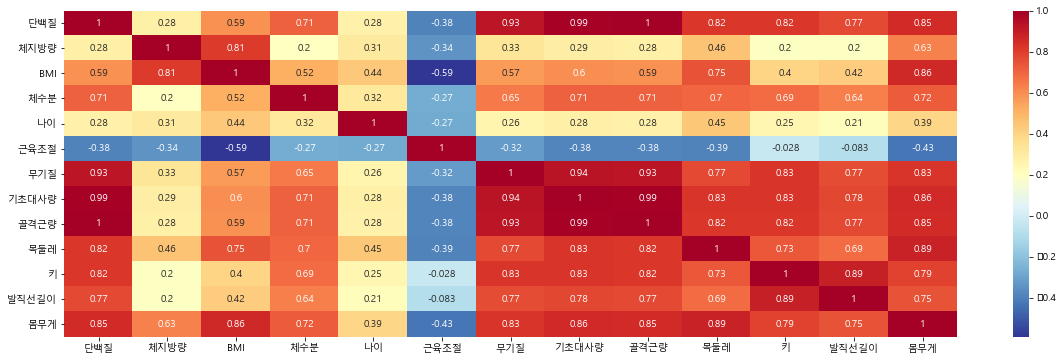

In [131]:
import seaborn as sns
fig = plt.figure(figsize = (20, 6))
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlBu_r')

<AxesSubplot:>

Text(0.5, 1.0, '성별과 다른 변수의 상관관계')

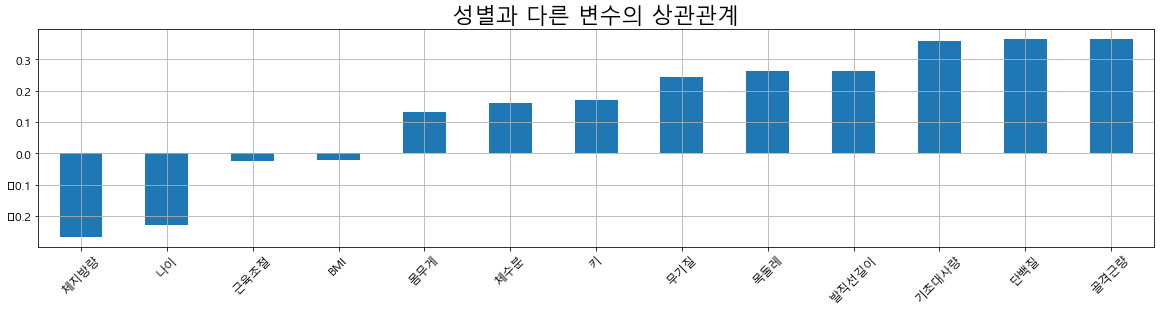

In [136]:
X = df.drop('성별', axis=1)
y = df['성별']
(X.corrwith(y).sort_values().plot.bar(figsize = (20, 4),
                                      fontsize = 12, rot = 45, grid = True))
plt.title('성별과 다른 변수의 상관관계', fontsize = 22)
plt.rc('xtick', labelsize=22)

## 4. 이산화(discretinization), 등등

In [164]:
df.isnull().sum()

단백질      0
체지방량     0
BMI      0
체수분      0
나이       0
근육조절     0
무기질      0
기초대사량    0
골격근량     0
목둘레      0
키        0
발직선길이    0
몸무게      0
성별       0
dtype: int64

# END